In [47]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

In [3]:
tc = pd.read_csv('tc.csv')

In [4]:
X_train, X_test = train_test_split(tc, test_size=0.2, random_state=0)

y_train = X_train['Survived']
y_test = X_test['Survived']

del X_train['Survived']
del X_test['Survived']

best accuracy score = 0.725
best params: {'estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 100}
accuracy = 0.860
f1_score = 0.809
roc_auc_score = 0.843


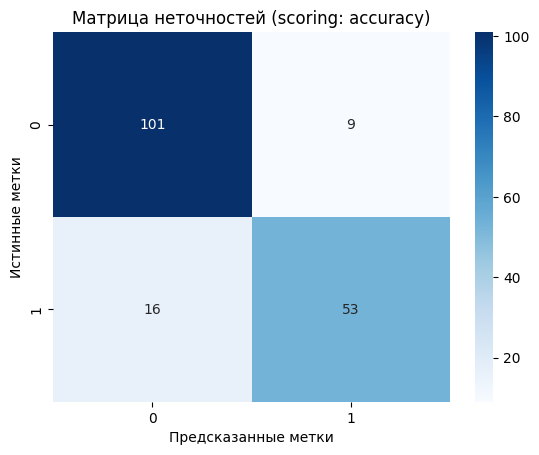

In [41]:
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=0)
param_grid = [{'n_estimators': [100, 200, 300],
                'learning_rate': [0.01, 0.1, 1.0],
                'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
gs = GridSearchCV(estimator=ada,
                  param_grid=param_grid,
                  scoring='recall',
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(f'best accuracy score = {gs.best_score_:.3f}')
print(f'best params: {gs.best_params_}')

clf = gs.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred)

adaa_accuracy = clf.score(X_test, y_test)
adaa_f1_score = f1_score(y_test, y_pred)
adaa_roc = roc_auc_score(y_test, y_pred)

print(f'accuracy = {adaa_accuracy:.3f}')
print(f'f1_score = {adaa_f1_score:.3f}')
print(f'roc_auc_score = {adaa_roc:.3f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.title('Матрица неточностей (scoring: accuracy)')
plt.show()